## Project 
### Part 1: Data Analysis 

In [27]:
#%pip install geopandas
#%pip install shapely
#%pip install geodatasets
#%pip install contextily mercantile
%pip install wordcloud matplotlib numpy Pillow


Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import pandas as pd


cwd = os.getcwd()
print(f"The current working directory is: {cwd}")

The current working directory is: C:\Users\evash


In [4]:
project = cwd + '\\AD699project\\'
#project = r"\AD699project\"

In [50]:
project2

'AD699project'

In [5]:
geneva_df = pd.read_csv( project + 'geneva_listings.csv')

In [67]:
geneva_df.info()
geneva_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458 entries, 0 to 2457
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            2458 non-null   float64
 1   listing_url                                   2458 non-null   object 
 2   scrape_id                                     2458 non-null   float64
 3   last_scraped                                  2458 non-null   object 
 4   source                                        2458 non-null   object 
 5   name                                          2458 non-null   object 
 6   description                                   2397 non-null   object 
 7   neighborhood_overview                         1185 non-null   object 
 8   picture_url                                   2458 non-null   object 
 9   host_id                                       2458 non-null   i

(2458, 75)

In [63]:
##1 geneva_df.head()missing values 
#geneva_df.columns = geneva_df.columns.str.replace(' ', '_')
geneva_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,42515.0,https://www.airbnb.com/rooms/42515,2.023090e+13,9/23/2023,city scrape,Rental unit in Geneva · ★4.73 · 1 bedroom · 1 ...,<b>The space</b><br />This is a private room w...,NaN,https://a0.muscache.com/pictures/10640277/ff1d...,185647,...,4.83,4.84,4.51,NaN,f,1,0,1,0,0.50
1,107438.0,https://www.airbnb.com/rooms/107438,2.023090e+13,9/23/2023,city scrape,Rental unit in Geneva · ★4.87 · 1 bedroom · 1 ...,<b>The space</b><br />Version Française et Ang...,NaN,https://a0.muscache.com/pictures/93bb00cc-03bb...,556499,...,4.76,4.57,4.57,NaN,f,1,0,1,0,0.18
2,203997.0,https://www.airbnb.com/rooms/203997,2.023090e+13,9/23/2023,city scrape,Rental unit in Geneva · ★4.90 · 1 bedroom · 1 ...,"Spacious studio with washer/dryer, Wi-fi, supe...",This is the most sought after area in Geneva: ...,https://a0.muscache.com/pictures/14163740/9392...,1001280,...,4.99,4.95,4.83,NaN,t,2,2,0,0,0.61
3,276025.0,https://www.airbnb.com/rooms/276025,2.023090e+13,9/23/2023,city scrape,Rental unit in Versoix · ★4.62 · 1 bedroom · 4...,This cozy flat is located in a very pleasant v...,NaN,https://a0.muscache.com/pictures/4156456/d3aed...,1442438,...,4.89,4.76,4.70,NaN,f,1,1,0,0,0.86
4,338682.0,https://www.airbnb.com/rooms/338682,2.023090e+13,9/23/2023,city scrape,Rental unit in Geneva · ★4.81 · 1 bedroom · 1 ...,One bedroom apartment located in a pedestrian ...,This is the favourite area for expats in Genev...,https://a0.muscache.com/pictures/14164129/db92...,1001280,...,4.89,4.87,4.70,NaN,t,2,2,0,0,0.82


In [69]:
#Generate Table showing number of missing value and % of each variable
missing_counts = geneva_df.isnull().sum()
missing_percentages = round((missing_counts / len(geneva_df)) * 100, 2)
missing_info = pd.DataFrame({
        'Missing_Values': missing_counts,
        'Percentage_Missing': missing_percentages
    })

val_to_drop = missing_info.query('Percentage_Missing >50 ')
val_to_drop
type(val_to_drop)
#need to drop a few 
# columns with more than 50% missing will be dropped. 
val_to_drop
val_to_drop_index_object = val_to_drop.index
drop_list = val_to_drop_index_object.tolist()
drop_list


df_removed = geneva_df.drop(columns=drop_list, axis=1)
df_removed.shape
#df_removed.info()
#summary statistics

(2458, 67)

In [33]:
df_test = geneva_df[geneva_df['neighborhood_overview'].notna()]
df_test['neighborhood_overview']
all_text_string = df_test['neighborhood_overview'].str.cat(sep=' ')
all_text_string

'This is the most sought after area in Geneva: the lake is practically on your doorstep, with a boat taxi (2chf/ride) taking you to the other side of the lake. You can run or roll along the promenade; there\'s a free bike rental offered by the city a stone\'s throw from the flat, by the Jardin Anglais. Chill out in the Bodega Tapas Bar across the street, or go for Cocktails at the nearby l\'Atelier. The following morning, have a vegetarian brunch at Clou de Giraffe or Pain Quotidien. Two much loved restaurants, Da Paolo and L\'esquisse, are on the same street. I guarantee you won\'t be thirsty or hungry in this neighbourhood! This is the favourite area for expats in Geneva. It\'s near the lake, has many bars and restaurants and even a few breakfast places nearby. With the lake practically on your doorstep, you\'re reminded each day what a nice city it is. The Pâquis quarter is one of Geneva\'s most colourful, where you\'ll find an attractive array of boho boutiques, bistros, ethnic eat

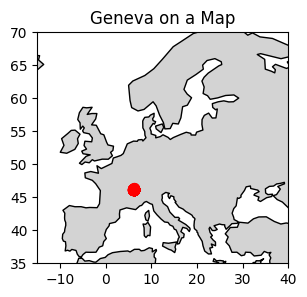

In [23]:
import pandas as pd
import geopandas 
import matplotlib.pyplot as plt
from shapely.geometry import Point

import geodatasets


df = geneva_df
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = geopandas.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326") # EPSG:4326 is WGS84 for lat/lon

# Plot the points on a simple map
path = geodatasets.get_path('naturalearth.land')
world = geopandas.read_file(path)

fig, ax = plt.subplots(figsize=(15, 3))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf.plot(ax=ax, marker='o', color='red', markersize=50)
ax.set_title('Cities on a World Map')

# --- Add this section to zoom into Geneva ---
# Define the approximate bounding box coordinates for Geneva (lon/lat)
# You can adjust these limits to fine-tune the zoom level.
# Example Bbox for area around Lake Geneva: xmin, xmax, ymin, ymax
lon_min, lon_max = -15, 40 
lat_min, lat_max = 35, 70 

ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)
# ------------------------------------------

ax.set_title('Geneva on a Map')
plt.show()

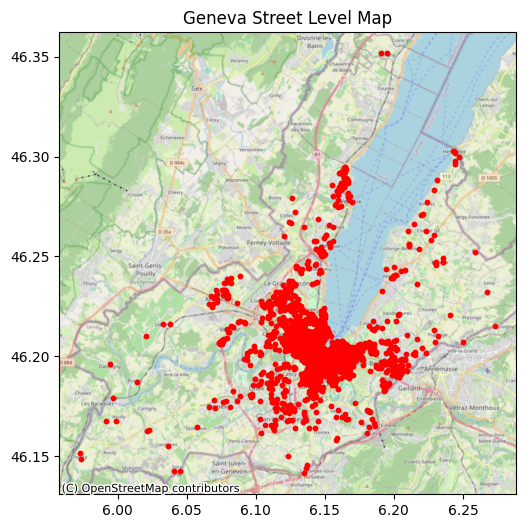

In [70]:
import geopandas
import matplotlib.pyplot as plt
import contextily as cx
from shapely.geometry import Point

# Assuming 'df' is defined with Geneva latitude and longitude
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
# Ensure your GeoDataFrame is in WGS84 (EPSG:4326) for contextily
gdf = geopandas.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# No need for path = geodatasets.get_path('naturalearth.land') anymore

fig, ax = plt.subplots(figsize=(6, 6))

# Plot your points first
gdf.plot(ax=ax, marker='o', color='red', markersize=10, zorder=10) # zorder ensures points are on top

# Add a street-level basemap using contextily
# cx.add_basemap automatically sets the axis limits based on the plotted data
# Use a specific provider for street maps, e.g., OpenStreetMap
cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik) 

ax.set_title('Geneva Street Level Map')
plt.show()

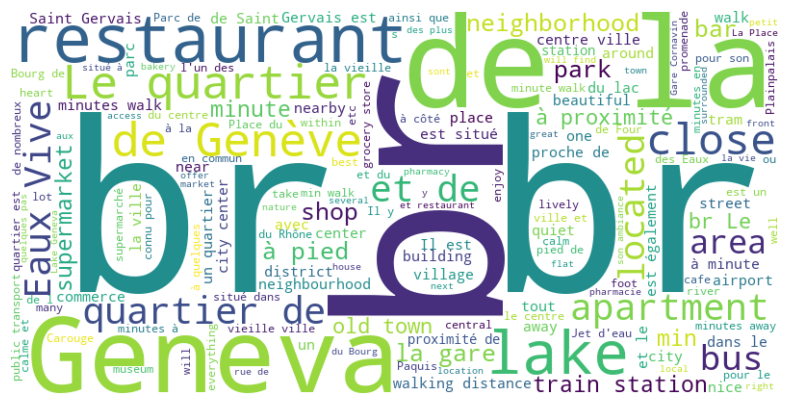

In [35]:
#wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
from PIL import Image

# 1. Provide your text data
# You can load this from a file (e.g., with open('my_text_file.txt', 'r').read())
text = all_text_string

# 2. Create and generate a word cloud image
# You can customize parameters like width, height, background color, max words, etc.
wordcloud = WordCloud(width=800, 
                      height=400, 
                      background_color='white', 
                      stopwords=set(STOPWORDS), 
                      min_font_size=10).generate(text)

# 3. Display the generated image using matplotlib
plt.figure(figsize=(10, 5))
# Use interpolation='bilinear' to make the image smooth
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") # Turn off the axis ticks and labels
plt.show()

# 4. Optional: Save the word cloud to a file
# wordcloud.to_file("first_wordcloud.png")